# Import data

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle

In [2]:
data = LoadData(20)

In [3]:
df = data.load_data()
df = shuffle(df)
print(df.shape)
df.head()

no image
no image
(298, 4)


,blue,green,red,label
30,37,28,238,0
220,198,76,0,11
29,110,23,73,14
135,13,103,244,1
82,67,170,43,7


## Prepare data 

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from keras.utils import np_utils
X = np.array(df.drop(['label'],axis=1))
X = scale(X)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_val = np_utils.to_categorical(y_test)
dummy_y = np_utils.to_categorical(y_train)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

c:\users\asus\appdata\local\programs\python\python3.6.5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\asus\appdata\local\programs\python\python3.6.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\asus\appdata\local\programs\python\python3.6.5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted 

# Create model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, BatchNormalization,MaxPool1D,Flatten

## First model

In [31]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(3,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(15, activation='softmax'))

## Second model 

In [155]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3,)))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(15,activation='softmax'))

In [156]:
# Testing different optimizers
from keras.optimizers import Adagrad, Adamax, Nadam, SGD, RMSprop, Adam
sgd = SGD(lr=0.01) # accuracy - 70,67%
adagrad = Adagrad() # accuracy - 60%
adamax = Adamax() # 60%

In [157]:
model.compile(loss='categorical_crossentropy',optimizer=Nadam(),metrics=['accuracy'])

## Fit model

In [158]:
# I used 100 epoches
history = model.fit(X_train, dummy_y, epochs=100,verbose=1, batch_size=12,validation_data=(X_test,y_val))

Train on 223 samples, validate on 75 samples
Epoch 1/100
223/223 [==============================] - 2s 7ms/step - loss: 2.5910 - acc: 0.1076 - val_loss: 2.2671 - val_acc: 0.2000
Epoch 2/100
223/223 [==============================] - 0s 852us/step - loss: 2.0795 - acc: 0.2825 - val_loss: 1.6509 - val_acc: 0.4800
Epoch 3/100
223/223 [==============================] - 0s 808us/step - loss: 1.9316 - acc: 0.2735 - val_loss: 1.6862 - val_acc: 0.3333
Epoch 4/100
223/223 [==============================] - 0s 897us/step - loss: 1.6870 - acc: 0.3722 - val_loss: 1.6353 - val_acc: 0.4400
Epoch 5/100
223/223 [==============================] - 0s 987us/step - loss: 1.6370 - acc: 0.3857 - val_loss: 1.5739 - val_acc: 0.4133
Epoch 6/100
223/223 [==============================] - 0s 808us/step - loss: 1.5564 - acc: 0.4395 - val_loss: 1.4474 - val_acc: 0.3733
Epoch 7/100
223/223 [==============================] - 0s 897us/step - loss: 1.5786 - acc: 0.3587 - val_loss: 1.5423 - val_acc: 0.4933
Epoch 8/100


223/223 [==============================] - 0s 852us/step - loss: 0.9968 - acc: 0.6547 - val_loss: 1.3069 - val_acc: 0.6533
Epoch 62/100
223/223 [==============================] - 0s 808us/step - loss: 0.9303 - acc: 0.6502 - val_loss: 1.3129 - val_acc: 0.6400
Epoch 63/100
223/223 [==============================] - 0s 852us/step - loss: 0.9590 - acc: 0.6951 - val_loss: 1.3151 - val_acc: 0.7200
Epoch 64/100
223/223 [==============================] - 0s 897us/step - loss: 0.9028 - acc: 0.6457 - val_loss: 1.3181 - val_acc: 0.7067
Epoch 65/100
223/223 [==============================] - 0s 808us/step - loss: 0.8931 - acc: 0.7085 - val_loss: 1.2922 - val_acc: 0.7467
Epoch 66/100
223/223 [==============================] - 0s 907us/step - loss: 1.0570 - acc: 0.6233 - val_loss: 1.2965 - val_acc: 0.7333
Epoch 67/100
223/223 [==============================] - 0s 808us/step - loss: 1.0271 - acc: 0.6816 - val_loss: 1.2964 - val_acc: 0.5600
Epoch 68/100
223/223 [==============================] - 0s 76

In [159]:
pred = model.predict(X_test)
# for i in range(len(pred)):
#     print(np.max(pred[i]))
y_pred = pred.argmax(axis=1)
for i in range(len(y_pred)):
    print('True : {} Pred : {}'.format(y_test[i],y_pred[i]))

True : 2 Pred : 0
True : 5 Pred : 5
True : 13 Pred : 13
True : 7 Pred : 7
True : 13 Pred : 13
True : 1 Pred : 1
True : 10 Pred : 10
True : 7 Pred : 7
True : 11 Pred : 0
True : 6 Pred : 5
True : 5 Pred : 2
True : 5 Pred : 5
True : 4 Pred : 3
True : 11 Pred : 11
True : 3 Pred : 3
True : 1 Pred : 1
True : 12 Pred : 14
True : 1 Pred : 0
True : 4 Pred : 1
True : 14 Pred : 14
True : 1 Pred : 1
True : 14 Pred : 14
True : 13 Pred : 12
True : 13 Pred : 14
True : 13 Pred : 13
True : 10 Pred : 10
True : 7 Pred : 7
True : 13 Pred : 13
True : 5 Pred : 5
True : 10 Pred : 10
True : 7 Pred : 7
True : 12 Pred : 12
True : 2 Pred : 2
True : 2 Pred : 2
True : 1 Pred : 1
True : 2 Pred : 2
True : 14 Pred : 14
True : 8 Pred : 8
True : 13 Pred : 13
True : 5 Pred : 6
True : 3 Pred : 3
True : 14 Pred : 14
True : 7 Pred : 3
True : 7 Pred : 6
True : 3 Pred : 3
True : 6 Pred : 6
True : 13 Pred : 13
True : 5 Pred : 2
True : 2 Pred : 0
True : 14 Pred : 14
True : 0 Pred : 0
True : 14 Pred : 14
True : 0 Pred : 0
True 

In [152]:
# model.save('nn-v2-adam-100epochs-higherdrop.h5')

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.72

## Plot loss and accuracy score

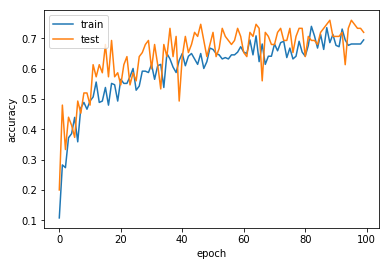

In [161]:
import matplotlib.pyplot as plt
# score 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

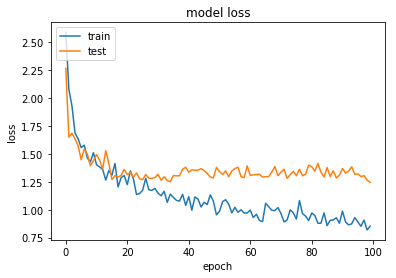

In [162]:
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()